In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
cd "/content/drive/MyDrive/Research/Colorization/Coloring-greyscale-images/Full-version"

/content/drive/MyDrive/Research/Colorization/Coloring-greyscale-images/Full-version


In [11]:
import keras
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Input, Reshape, merge, concatenate
from keras.layers import Activation, Dense, Dropout, Flatten,Layer,BatchNormalization
from keras.callbacks import TensorBoard 
from keras.models import Sequential, Model
from keras.layers.core import RepeatVector, Permute
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img,smart_resize
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf

In [12]:
#Load weights
inception = InceptionResNetV2(weights='imagenet', include_top=True)

In [13]:
def create_inception_embedding(grayscaled_rgb):
    grayscaled_rgb_resized = []
    for i in grayscaled_rgb:
        i = resize(i, (299, 299, 3), mode='constant')
        grayscaled_rgb_resized.append(i)
    grayscaled_rgb_resized = np.array(grayscaled_rgb_resized)
    grayscaled_rgb_resized = preprocess_input(grayscaled_rgb_resized)
    embed = inception.predict(grayscaled_rgb_resized)
    return embed


In [ ]:
# color_me = []
# for filename in os.listdir('Dataset/Test/'):
#     color_me.append(img_to_array(load_img('Dataset/Test/'+filename)))
# color_me = np.array(color_me, dtype=float)
# gray_me = gray2rgb(rgb2gray(1.0/255*color_me))
# color_me_embed = create_inception_embedding(gray_me)
# color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
# color_me = color_me.reshape(color_me.shape+(1,))

# from keras.models import load_model
# # load model
# model = load_model('modelV1.h5')

# # Test model
# output = model.predict([color_me, color_me_embed])
# output = output * 128

# # Output colorizations
# for i in range(len(output)):
#     cur = np.zeros((256, 256, 3))
#     cur[:,:,0] = color_me[i][:,:,0]
#     cur[:,:,1:] = output[i]
#     imsave("result/img_"+str(i)+".png", lab2rgb(cur))
#     imsave("result/img_"+str(i)+"_gray.png", rgb2gray(lab2rgb(cur)))

Saving Video_21 (2).jpg to Video_21 (2).jpg


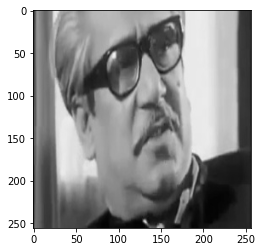

In [14]:
from google.colab import files

images = files.upload()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for filename in images:
  break

img = mpimg.imread(filename)
gray_me = gray2rgb(rgb2gray(1.0/255*img ))
imgplot = plt.imshow(gray_me)
plt.show()

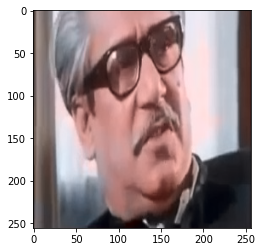

In [15]:
color_me = []
i =load_img(filename)
i = i.resize((256,256))
color_me.append(img_to_array(i))
color_me = np.array(color_me, dtype=float)
gray_me = gray2rgb(rgb2gray(1.0/255*color_me))
color_me_embed = create_inception_embedding(gray_me)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))

from keras.models import load_model
# load model
model = load_model('modelV1.h5')

# Test model


output = model.predict([color_me, color_me_embed])
output = output * 128

# Output colorizations
for i in range(len(output)):
    cur = np.zeros((256, 256, 3))
    cur[:,:,0] = color_me[i][:,:,0]
    cur[:,:,1:] = output[i]
    # imsave("result/img_"+str(11)+".png", lab2rgb(cur))
    # imsave("result/img_"+str(11)+"_gray.png", rgb2gray(lab2rgb(cur)))
    imgplot = plt.imshow(lab2rgb(cur))
    plt.show()

In [ ]:
!pip install tensorflowjs

In [ ]:
from keras.models import load_model
# load model
model = load_model('modelV1.h5')

In [ ]:
!tensorflowjs_converter --input_format keras 'modelV1.h5' 'model'

2021-02-26 14:17:50.026330: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [ ]:
!dir

Dataset      modelV1.h5		  result			     Video1.mp4
model	     modelV1.json	  Test.ipynb			     Video.mp4
Model.ipynb  modelweightsV1.h5	  Train.ipynb
model.png    Preprocessing.ipynb  train_loss_VS_validation_loss.png
